In [ ]:
# In a given city, matching solves the graph for all UberX Master VVIDs together while cancel 
# model improvements are limited to covered VVIDs where we use the primary model. The notebook investigates the 
# gap in the distributions of the primary and secondary models (see improvement plan doc for interesting stats on this).
# Given the extreme divergence in distributions, matching will often make choices purely based on whether a node in the matching graph is covered or not (which is not the tradeoff we want to make!).  

# Reference doc: https://docs.google.com/document/d/1T8ximX9ZBU5jLF_esjpQxsPIRwbktKZAHn_A6Thid7I/edit#heading=h.n00qyxd49okv

In [2]:
import pandas as pd, numpy as np

In [3]:
data = pd.read_csv("Paris_UberX_probs_rf_lr.csv") # https://querybuilder-ea.uberinternal.com/r/meSaQarnf/run/aBi9IMvy5/edit

In [4]:
data.replace("\\N", np.nan, inplace=True)

In [5]:
data.isna().sum(axis=0)/data.shape[0]

vehicle_view_id                         0.000000
original_driver_accept_prob             0.000000
solo_cancel_model_driver_accept_prob    0.207276
original_rider_accept_prob              0.000000
solo_cancel_model_rider_accept_prob     0.207276
dtype: float64

In [6]:
rf_probs = data[~data.solo_cancel_model_driver_accept_prob.isna()]['solo_cancel_model_driver_accept_prob'] #
lr_probs = data['original_driver_accept_prob']

In [7]:
rf_probs = [float(val) for val in rf_probs]

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'count')

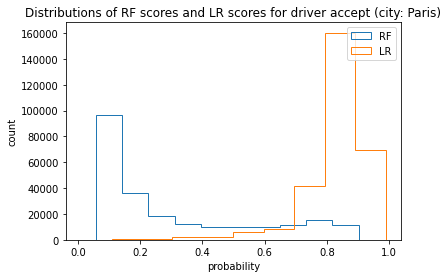

In [13]:
plt.title("Distributions of RF scores and LR scores for driver accept (city: Paris)")
plt.hist(rf_probs, label="RF", histtype='step')
plt.hist(lr_probs, label="LR", histtype='step')
plt.legend()
plt.xlabel("probability")
plt.ylabel("count")

array([[1.       , 0.1497855],
       [0.1497855, 1.       ]])

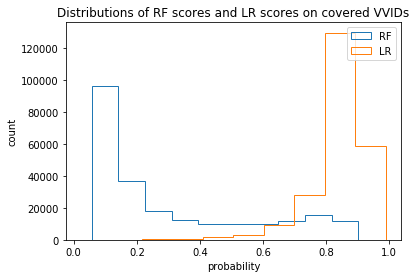

In [119]:
lr_probs_covered = data[~data.solo_cancel_model_driver_accept_prob.isna()]['original_driver_accept_prob']
rf_probs_covered = data[~data.solo_cancel_model_driver_accept_prob.isna()]['solo_cancel_model_driver_accept_prob']
rf_probs_covered = [float(val) for val in rf_probs_covered]

plt.title("Distributions of RF scores and LR scores on covered VVIDs")
plt.hist(rf_probs_covered, label="RF", histtype='step')
plt.hist(lr_probs_covered, label="LR", histtype='step')
plt.legend()
plt.xlabel("probability")
plt.ylabel("count")

np.corrcoef(lr_probs_covered, rf_probs_covered)

Text(0,0.5,'count')

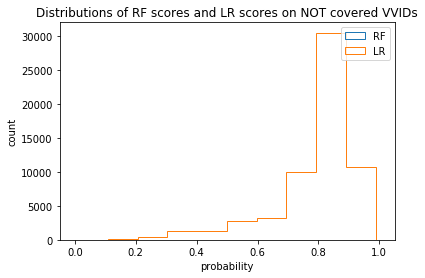

In [120]:
lr_probs_uncovered = data[data.solo_cancel_model_driver_accept_prob.isna()]['original_driver_accept_prob']
rf_probs_uncovered = data[data.solo_cancel_model_driver_accept_prob.isna()]['solo_cancel_model_driver_accept_prob']
rf_probs_uncovered = [float(val) for val in rf_probs_uncovered]

plt.title("Distributions of RF scores and LR scores on NOT covered VVIDs")
plt.hist([], label="RF", histtype='step')
plt.hist(lr_probs_uncovered, label="LR", histtype='step')
plt.legend()
plt.xlabel("probability")
plt.ylabel("count")

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'count')

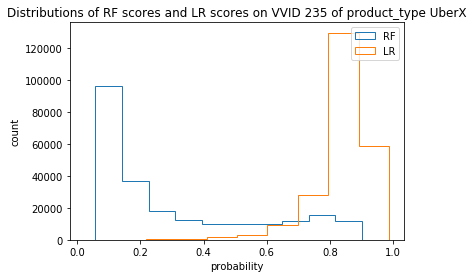

In [121]:
# breakdown by vehicle view id
lr_probs_vvid= data[~data.solo_cancel_model_driver_accept_prob.isna()][data.vehicle_view_id == 235]['original_driver_accept_prob']
rf_probs_vvid = data[~data.solo_cancel_model_driver_accept_prob.isna()][data.vehicle_view_id == 235]['solo_cancel_model_driver_accept_prob']
rf_probs_vvid = [float(val) for val in rf_probs_vvid]

plt.title("Distributions of RF scores and LR scores on VVID 235 of product_type UberX")
plt.hist(rf_probs_vvid, label="RF", histtype='step')
plt.hist(lr_probs_vvid, label="LR", histtype='step')
plt.legend()
plt.xlabel("probability")
plt.ylabel("count")

/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/dsw/snapshots/snapshot_dsw_default_jupyter/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'count')

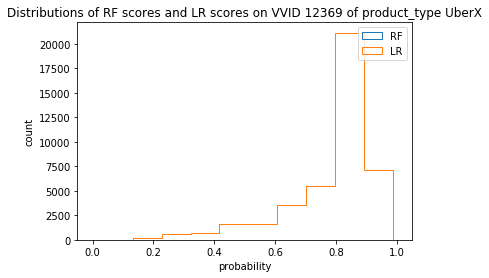

In [122]:
# breakdown by vehicle view id
lr_probs_vvid= data[data.solo_cancel_model_driver_accept_prob.isna()][data.vehicle_view_id == 12369]['original_driver_accept_prob']
rf_probs_vvid = data[data.solo_cancel_model_driver_accept_prob.isna()][data.vehicle_view_id == 12369]['solo_cancel_model_driver_accept_prob']
rf_probs_vvid = [float(val) for val in rf_probs_vvid]

plt.title("Distributions of RF scores and LR scores on VVID 12369 of product_type UberX")
plt.hist([], label="RF", histtype='step')
plt.hist(lr_probs_vvid, label="LR", histtype='step')
plt.legend()
plt.xlabel("probability")
plt.ylabel("count")

In [73]:
data[~data.solo_cancel_model_driver_accept_prob.isna()]['original_driver_accept_prob'].shape

(231289,)

In [74]:
data.shape

(291765, 3)

In [65]:
data.vehicle_view_id.value_counts()

235         231292
12369        41907
20021745      7916
72            6027
20023055      2092
35            2061
20039113       463
20025941         5
20006193         2
Name: vehicle_view_id, dtype: int64

In [110]:
data.columns

Index(['vehicle_view_id', 'original_driver_accept_prob',
       'solo_cancel_model_driver_accept_prob'],
      dtype='object')

# Rider cancel breakdown

Text(0,0.5,'count')

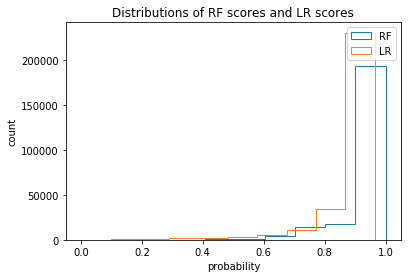

In [127]:
rf_probs = data[~data.solo_cancel_model_driver_accept_prob.isna()]['solo_cancel_model_rider_accept_prob'] #
lr_probs = data['original_rider_accept_prob']
rf_probs = [float(val) for val in rf_probs]

plt.title("Distributions of RF scores and LR scores")
plt.hist(rf_probs, label="RF", histtype='step')
plt.hist(lr_probs, label="LR", histtype='step')
plt.legend()
plt.xlabel("probability")
plt.ylabel("count")

array([[1.        , 0.71983424],
       [0.71983424, 1.        ]])

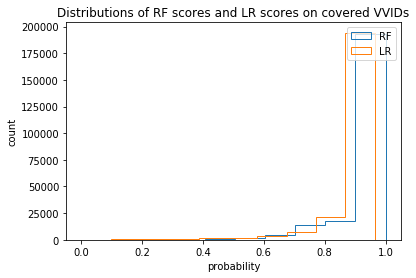

In [128]:
lr_probs_covered = data[~data.solo_cancel_model_driver_accept_prob.isna()]['original_rider_accept_prob']
rf_probs_covered = data[~data.solo_cancel_model_driver_accept_prob.isna()]['solo_cancel_model_rider_accept_prob']
rf_probs_covered = [float(val) for val in rf_probs_covered]

plt.title("Distributions of RF scores and LR scores on covered VVIDs")
plt.hist(rf_probs_covered, label="RF", histtype='step')
plt.hist(lr_probs_covered, label="LR", histtype='step')
plt.legend()
plt.xlabel("probability")
plt.ylabel("count")

np.corrcoef(lr_probs_covered, rf_probs_covered)